In [1]:
import xarray as xr
import numpy as np

from matplotlib import pyplot as plt
import cartopy as cy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from geopy import distance
import math
import re

In [2]:
OPeNDAP_url = 'https://thredds.met.no/thredds/dodsC/ww3_4km_latest_files/ww3_C3_SPC_20241216T00Z.nc'
ds =  xr.open_dataset(OPeNDAP_url)
ds

<xarray.Dataset> Size: 215MB
Dimensions:                  (direction: 36, freq: 36, x: 283, y: 1, time: 73)
Coordinates:
  * direction                (direction) float32 144B 5.0 15.0 ... 345.0 355.0
  * freq                     (freq) float32 144B 0.03452 0.03798 ... 0.9702
  * x                        (x) int32 1kB 1 2 3 4 5 6 ... 279 280 281 282 283
  * y                        (y) int32 4B 1
  * time                     (time) datetime64[ns] 584B 2024-12-15T18:00:00 ....
    longitude                (y, x) float32 1kB ...
    latitude                 (y, x) float32 1kB ...
Data variables:
    forecast_reference_time  datetime64[ns] 8B ...
    SPEC                     (time, y, x, freq, direction) float64 214MB ...
    ff                       (time, y, x) float64 165kB ...
    dd                       (time, y, x) float64 165kB ...
    Pdir                     (time, y, x) float32 83kB ...
    hs                       (time, y, x) float32 83kB ...
    tp                       (time, y, x) float32 83kB ...
Attributes:
    title:                           2D wave spectra
    history:                         Mon Dec 16 03:28:08 2024: ncks -A -v hs,...
    history_of_appended_files:       Mon Dec 16 03:28:08 2024: Appended file ...
    NCO:                             netCDF Operators version 5.0.6 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  time

In [3]:
ds.latitude

<xarray.DataArray 'latitude' (y: 1, x: 283)> Size: 1kB
[283 values with dtype=float32]
Coordinates:
  * x          (x) int32 1kB 1 2 3 4 5 6 7 8 ... 276 277 278 279 280 281 282 283
  * y          (y) int32 4B 1
    longitude  (y, x) float32 1kB ...
    latitude   (y, x) float32 1kB ...
Attributes:
    standard_name:  latitude
    units:          degree_north
    long_name:      latitude

In [4]:
res = ds.longitude
res.values

array([[2.78  , 2.8397, 2.8994, 2.9591, 3.0187, 3.0783, 3.1379, 3.1974,
        3.257 , 3.3165, 3.376 , 3.4355, 3.495 , 3.5544, 3.6138, 3.6732,
        3.7326, 3.792 , 3.8513, 3.9106, 3.9699, 4.0292, 4.0884, 4.1477,
        4.2069, 4.2661, 4.3252, 4.3844, 4.4435, 4.5026, 4.5617, 4.6207,
        4.6797, 4.7387, 4.7977, 4.8567, 4.9156, 4.9745, 5.0334, 5.0923,
        5.1511, 5.2099, 5.2687, 5.3275, 5.3862, 5.445 , 5.5037, 5.5623,
        5.621 , 5.6796, 5.7382, 5.7968, 5.8553, 5.9139, 5.9723, 6.0308,
        6.0893, 6.1477, 2.7907, 6.1616, 2.8015, 6.1755, 2.8122, 6.1894,
        2.823 , 6.2033, 2.8338, 6.2172, 2.8446, 6.2312, 2.8554, 6.2452,
        2.8662, 6.2592, 2.8771, 6.2733, 2.888 , 6.2873, 2.8989, 6.3014,
        2.9098, 6.3155, 2.9207, 2.9317, 2.9427, 2.9537, 2.9647, 2.9758,
        2.9868, 2.9979, 3.009 , 3.0201, 3.0313, 3.0424, 3.0536, 3.0648,
        3.076 , 3.0873, 3.0986, 3.1098, 3.1212, 3.1325, 3.1438, 3.1552,
        3.1666, 3.178 , 3.1894, 3.2009, 3.2124, 3.2238, 3.2354, 

In [5]:
ds.longitude

<xarray.DataArray 'longitude' (y: 1, x: 283)> Size: 1kB
array([[2.78  , 2.8397, 2.8994, ..., 7.9295, 7.9987, 8.068 ]], dtype=float32)
Coordinates:
  * x          (x) int32 1kB 1 2 3 4 5 6 7 8 ... 276 277 278 279 280 281 282 283
  * y          (y) int32 4B 1
    longitude  (y, x) float32 1kB 2.78 2.84 2.899 2.959 ... 7.93 7.999 8.068
    latitude   (y, x) float32 1kB ...
Attributes:
    standard_name:  longitude
    units:          degree_east
    long_name:      longitude

In [6]:
type(ds.longitude)

xarray.core.dataarray.DataArray

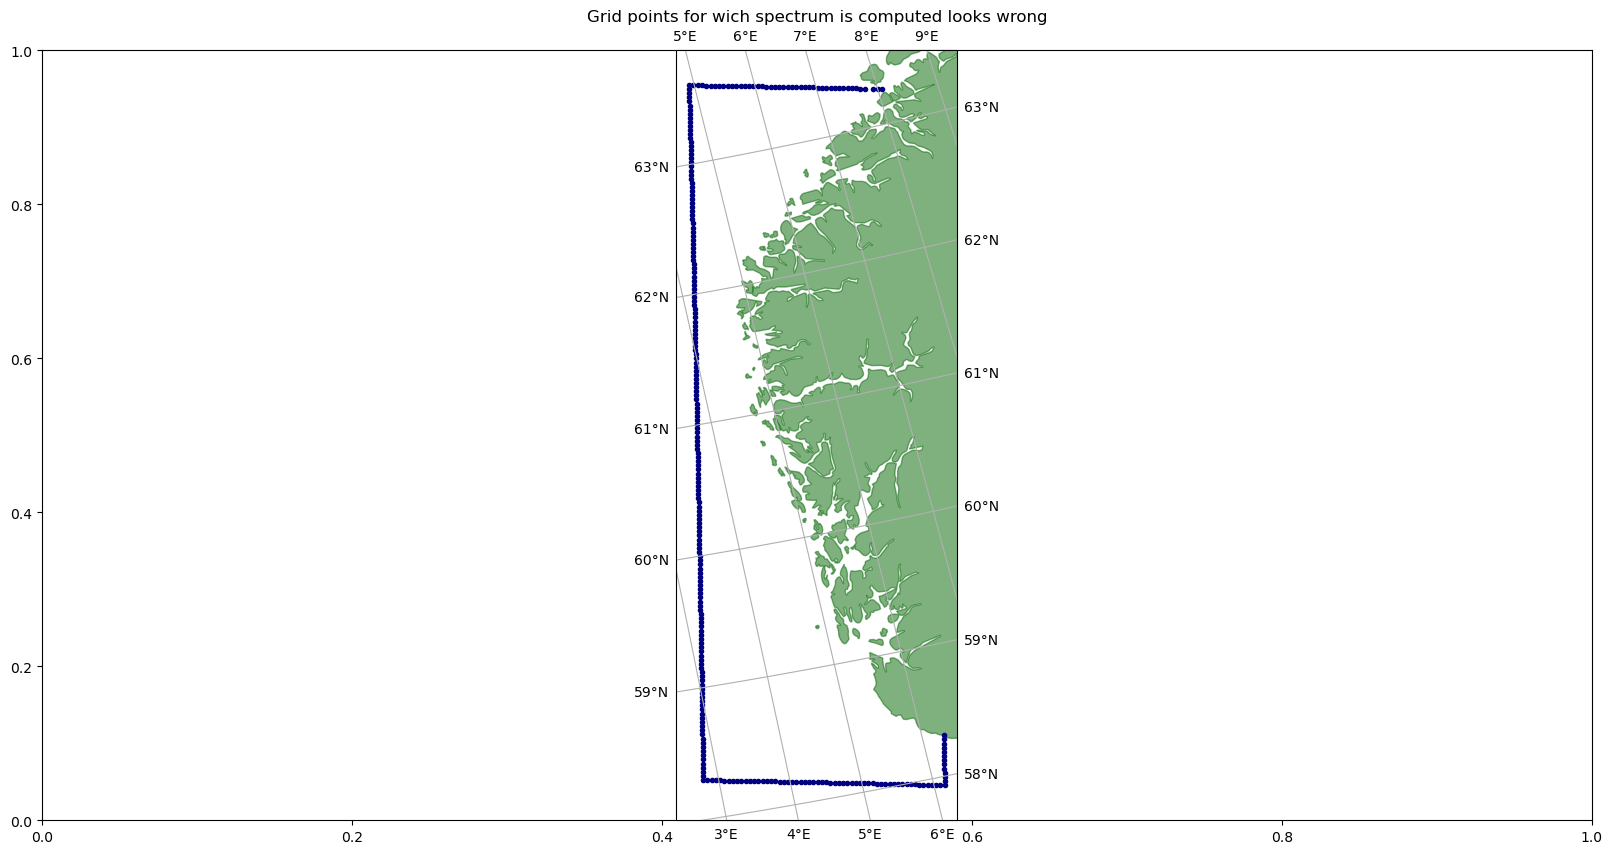

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.add_feature(cfeature.LAND,color='darkgreen', alpha = 0.5)
#ax.add_feature(cfeature.LAKES)
#ax.coastlines(resolution='50m', color='darkkhaki', linewidth=0.5)
ax.scatter(ds.longitude.values[0],ds.latitude.values[0],marker='.', color='navy', transform=ccrs.PlateCarree())
ax.set_title("Grid points for wich spectrum is computed looks wrong")
ax.gridlines(draw_labels=True)

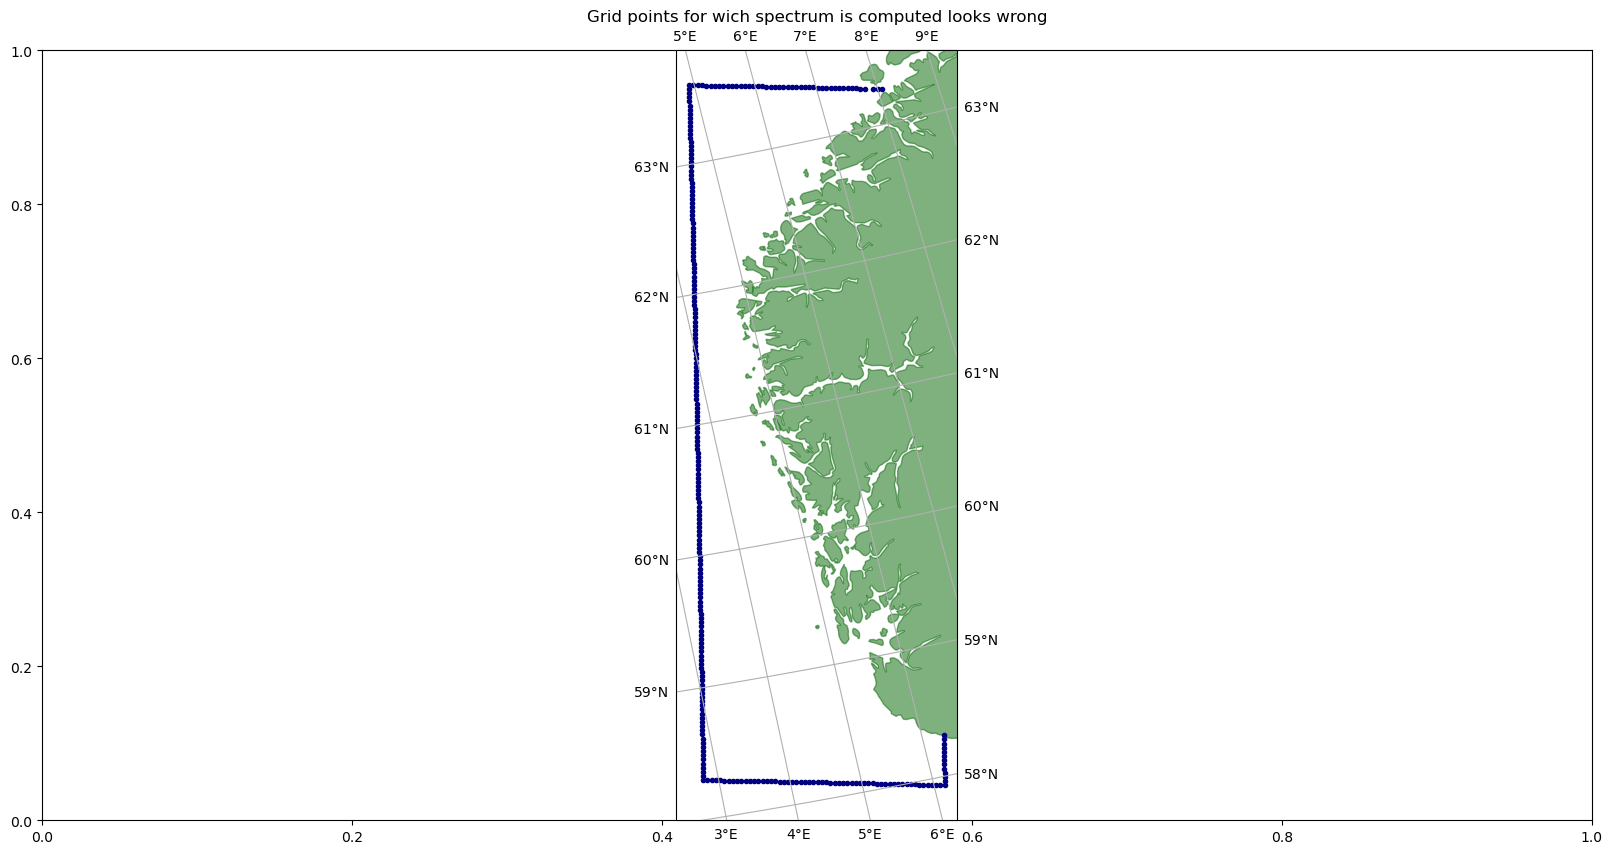

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.add_feature(cfeature.LAND,color='darkgreen', alpha = 0.5)
#ax.add_feature(cfeature.LAKES)
#ax.coastlines(resolution='50m', color='darkkhaki', linewidth=0.5)
ax.scatter(ds.longitude,ds.latitude,marker='.', color='navy', transform=ccrs.PlateCarree())
ax.set_title("Grid points for wich spectrum is computed looks wrong")
ax.gridlines(draw_labels=True)